In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Linear Regression (single)

- Features (inputs), we'll call these x (or x if vectors)
- Training examples, many x(i) for which y(i) is known 
(e.g., many movies for which we know the rating)
- A model, a function that represents the relationship 
between x and y
- A loss/a cost/an objective function, which tells us 
how well our model approximates the training 
examples
- Optimization, a way of finding the parameters of 
our model that minimizes the loss function


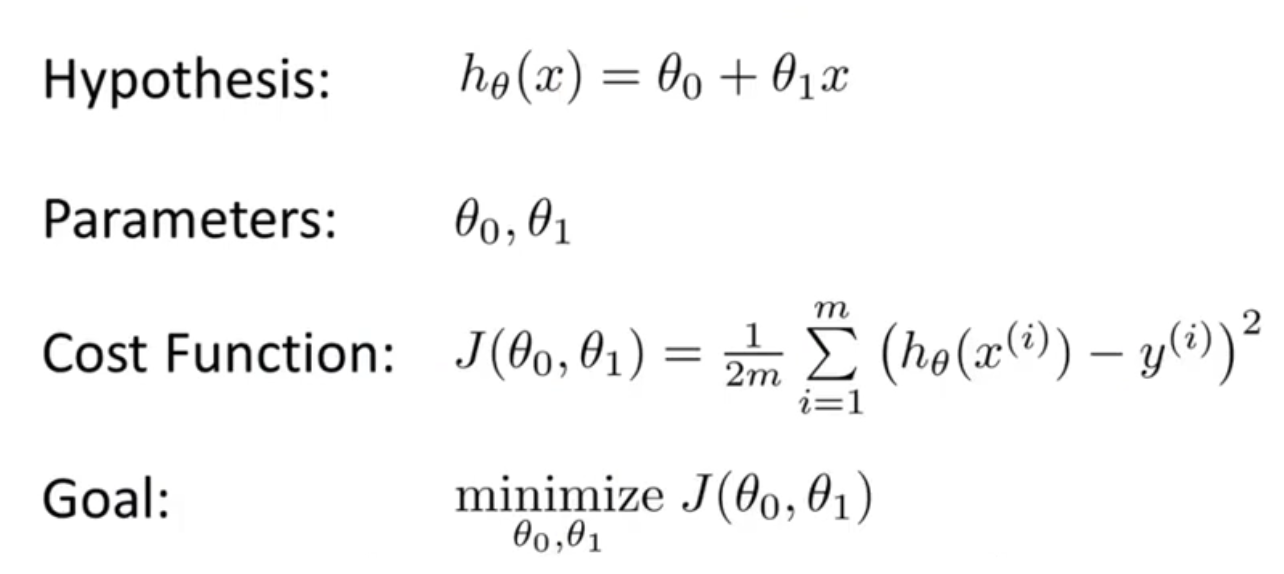

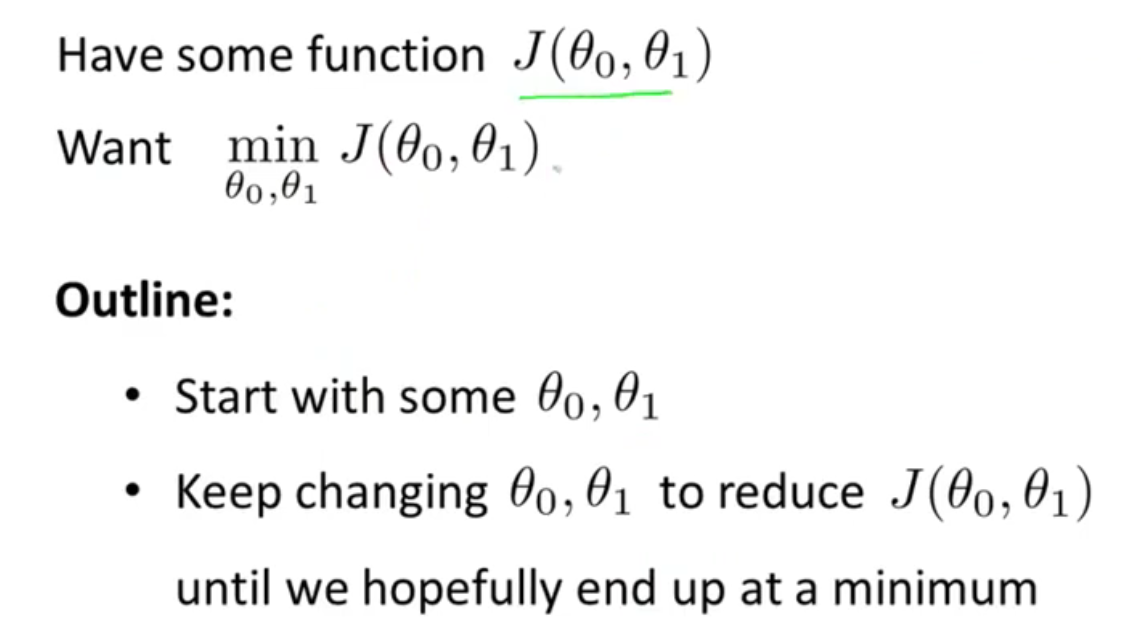

#### 1.3 Gradient descent

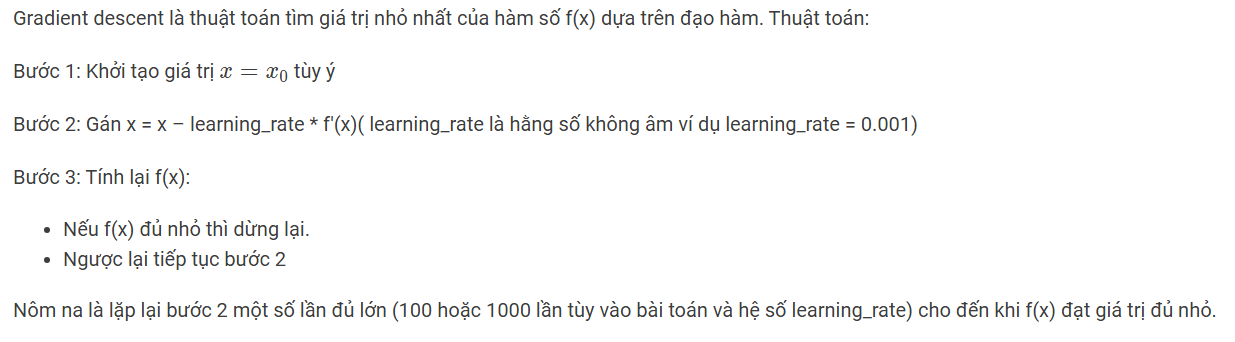

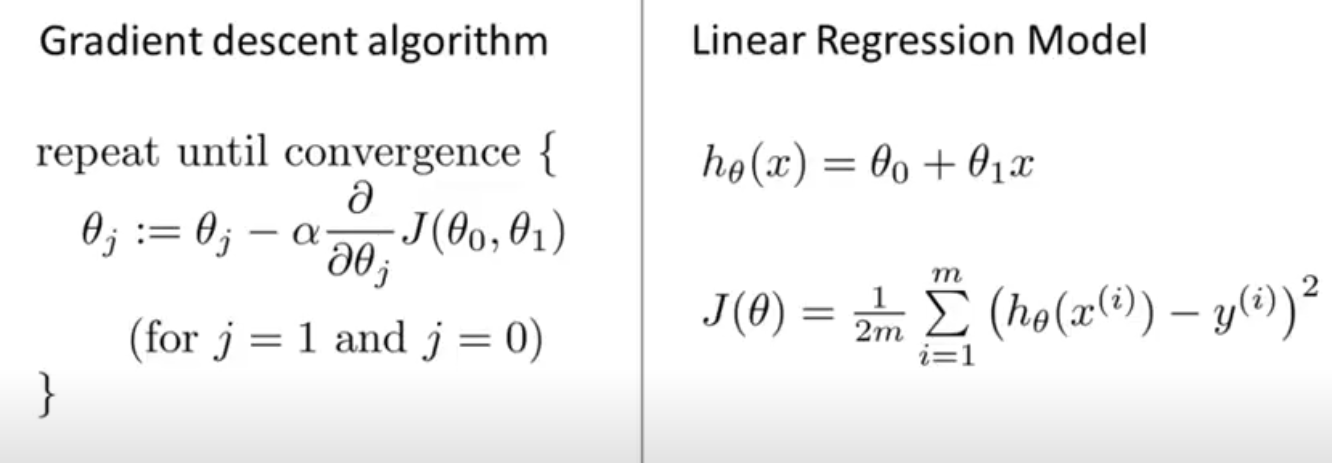

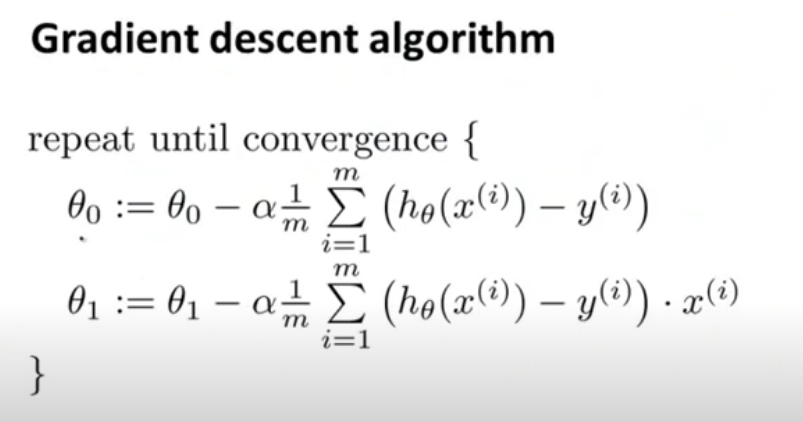

- Đạo hàm từng biến của ho(x)' * J(o)'
- Đạo hàm của F(g(x))' = F(x)' * g(x)'
- Example ((2x + 1)^2)' = 2*(2x+1) * 2

In [2]:
class LinearRegressionSingle():
    def __init__(self,learning_rate,epochs,bias=0,weight=0):
        self.learning_rate = learning_rate
        self.epochs=epochs
        self.bias=bias
        self.weight=weight
    def CostFunction(self):
        #MSE
        J = (1/(2*len(self.input)))* np.sum(
            np.square(
                np.array([self.predict(x) for x in self.input]) - self.target
            )
        )
        return J
    def predict(self,x):
        return self.bias + np.multiply(x,self.weight)
    def update_weights(self):
        #GradientDescent
        w0_grad = (1/len(self.input))*np.sum(
            np.array([self.predict(x) for x in self.input]) - self.target
        )
        w1_grad = (1/len(self.input))* np.sum(
             np.multiply(np.array([self.predict(x) for x in self.input]) - self.target,self.input)
        )
        self.bias -= (self.learning_rate * w0_grad)
        self.weight -= (self.learning_rate * w1_grad) 
    def fit(self,input,target):
        self.input = input
        self.target = target
        for i in range(self.epochs):
            self.update_weights()
            cost = self.CostFunction()
            print(f"Epoch {i+1}: Weight = {self.weight}, Bias = {self.bias}, Learning Rate = {self.learning_rate}\nCost = {cost}")

In [3]:
# URL của tệp CSV
url = 'https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L1/data_linear.csv'
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv(url)

input = np.array(data['Diện tích'])
target = np.array(data['Giá'])

In [4]:
input

array([ 30.    ,  32.4138,  34.8276,  37.2414,  39.6552,  42.069 ,
        44.4828,  46.8966,  49.3103,  51.7241,  54.1379,  56.5517,
        58.9655,  61.3793,  63.7931,  66.2069,  68.6207,  71.0345,
        73.4483,  75.8621,  78.2759,  80.6897,  83.1034,  85.5172,
        87.931 ,  90.3448,  92.7586,  95.1724,  97.5862, 100.    ])

In [5]:
target

array([ 448.524,  509.248,  535.104,  551.432,  623.418,  625.992,
        655.248,  701.377,  748.918,  757.881,  831.004,  855.409,
        866.707,  902.545,  952.261,  995.531, 1069.78 , 1074.42 ,
       1103.88 , 1138.69 , 1153.13 , 1240.27 , 1251.9  , 1287.97 ,
       1320.47 , 1374.92 , 1410.16 , 1469.69 , 1478.54 , 1515.28 ])

In [6]:
LRS = LinearRegressionSingle(0.0001,50)
LRS.fit(input,target)


Epoch 1: Weight = 7.044722974037333, Bias = 0.09816566333333335, Learning Rate = 0.0001
Cost = 151783.53755870598
Epoch 2: Weight = 10.804914543669346, Bias = 0.1505308107690907, Learning Rate = 0.0001
Cost = 43333.03608789072
Epoch 3: Weight = 12.811954727756943, Bias = 0.17844947648749637, Learning Rate = 0.0001
Cost = 12435.520057742033
Epoch 4: Weight = 13.88323288000026, Bias = 0.19331958914276082, Learning Rate = 0.0001
Cost = 3632.826787918326
Epoch 5: Weight = 14.455038717721925, Bias = 0.2012249067971782, Learning Rate = 0.0001
Cost = 1124.9420291570314
Epoch 6: Weight = 14.760246227571972, Bias = 0.2054126959746393, Learning Rate = 0.0001
Cost = 410.4463652431886
Epoch 7: Weight = 14.923154221796267, Bias = 0.20761621755915735, Learning Rate = 0.0001
Cost = 206.8867274004009
Epoch 8: Weight = 15.010108430753045, Bias = 0.20876061682905903, Learning Rate = 0.0001
Cost = 148.89261322903468
Epoch 9: Weight = 15.056521549521495, Bias = 0.20933969930081467, Learning Rate = 0.0001


In [7]:
target_predict = LRS.predict(input)

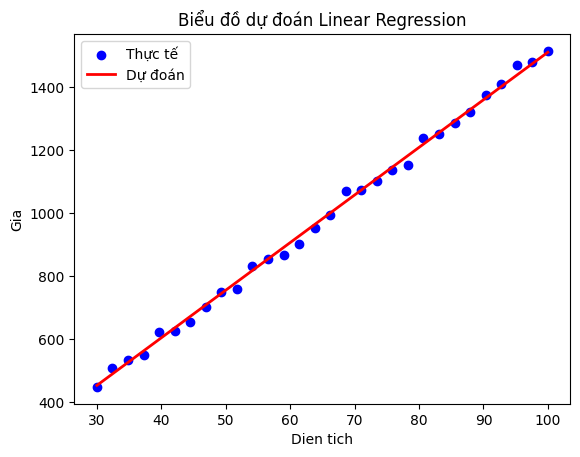

In [8]:
# Dự đoán và vẽ biểu đồ
plt.scatter(input, target, color='blue', label='Thực tế')
plt.plot(input, target_predict, color='red', linewidth=2, label='Dự đoán')
plt.xlabel('Dien tich')
plt.ylabel('Gia')
plt.title('Biểu đồ dự đoán Linear Regression')
plt.legend()
plt.show()
